Jensen-Shannon divergence analysis for Benford's law
Processing 66216 data points
Counting of the first digits in each row [Cell]:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Total count of the first digits in the dataset


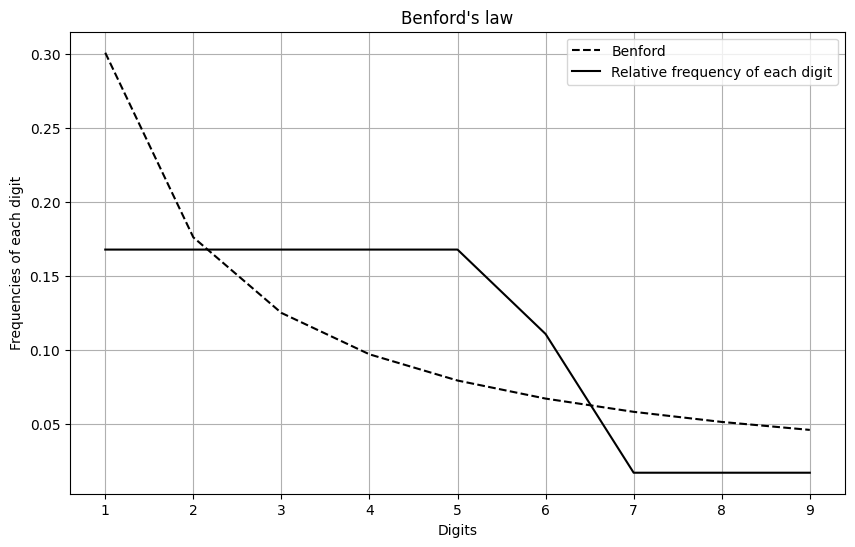

Calculating Jensen-Shannon distances...
Mean JS distance: 1.930381
Standard deviation: 0.000000
Lower limit: 1.930381
Upper limit: 1.930381
Jensen-Shannon analysis completed successfully!
Output files generated:
- jensen_labels.txt
JS distances calculated: 9
Classification results: 9 normal, 0 anomalous


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def jensen_shannon_distance(P, Q):
    """
    Calculate Jensen-Shannon distance between two probability distributions.

    Args:
        P, Q: Probability distributions (must sum to 1)

    Returns:
        Jensen-Shannon distance
    """
    epsilon = 1e-10
    P = P + epsilon
    Q = Q + epsilon

    # Normalize to ensure they sum to 1
    P = P / np.sum(P)
    Q = Q / np.sum(Q)

    # Calculate M (average distribution)
    M = 0.5 * (P + Q)

    # Calculate Jensen-Shannon divergence
    js_divergence = 0.5 * np.sum(P * np.log(P / M) + Q * np.log(Q / M))

    # Return distance (square root of divergence)
    return np.sqrt(js_divergence)

def main():
    print("Jensen-Shannon divergence analysis for Benford's law")
    print("=" * 80)

    # File path - update this to match your data location
    filename = 'Labels.xlsx'

    try:
        # Read Excel file starting from row 2, column 1
        df = pd.read_excel(filename, header=None)
        vnc = df.iloc[1:, 0].values  # Skip first row, take first column

        # Calculate first digit
        calculate_first_digit = np.array([int(str(v)[0]) for v in vnc if str(v)[0].isdigit()])

        nlines = len(calculate_first_digit)
        print(f"Processing {nlines} data points")

        # Count occurrences of each digit (1-9)
        digits = np.arange(1, 10)
        counts = np.histogram(calculate_first_digit, bins=np.append(digits, 10))[0]

        print("Counting of the first digits in each row [Cell]:")
        print("+" * 80)

        # Calculate frequencies
        sum1 = np.sum(counts)
        freq_occurrence = counts / sum1
        freq_occurrence1 = freq_occurrence.reshape(1, -1)

        print("+" * 80)
        print('Total count of the first digits in the dataset')

        count = np.histogram(calculate_first_digit, bins=np.append(digits, 10))[0]
        sum2 = np.sum(count)
        relative_frequency = count / sum2

        # Benford's law
        benford = np.log10(1 + (1 / digits))

        # Create plot
        plt.figure(1, figsize=(10, 6))
        x = np.arange(1, 10)
        plt.plot(x, benford, '--', label='Benford', color='black')
        plt.plot(x, relative_frequency, color='black', label='Relative frequency of each digit')
        plt.title("Benford's law")
        plt.xlabel('Digits')
        plt.ylabel('Frequencies of each digit')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Normalize Benford's distribution to sum to 1
        benford = benford / np.sum(benford)
        epsilon = 1e-10

        # Array to store distances for each column
        js_distances = np.zeros(freq_occurrence1.shape[1])

        print("Calculating Jensen-Shannon distances...")

        for i in range(freq_occurrence1.shape[1]):
            # Extract and normalize the current column
            col = freq_occurrence1[:, i] + epsilon
            col = col / np.sum(col)  # Normalize so sum equals 1

            # Add epsilon and normalize Benford again for safety
            P = col
            Q = benford + epsilon
            Q = Q / np.sum(Q)

            # Calculate M and Jensen-Shannon distance
            M = 0.5 * (P + Q)
            js_distance = 0.5 * np.sum(P * np.log(P / M) + Q * np.log(Q / M))

            # Store the calculated distance
            js_distances[i] = js_distance

        js = js_distances

        # Statistical analysis of distances
        media_distancias = np.mean(js)
        desvio_distancias = np.std(js)
        limite_maximo = media_distancias + desvio_distancias
        limite_minimo = media_distancias - desvio_distancias

        # Classification based on limits
        classificacao = (js >= limite_minimo) & (js <= limite_maximo)

        print(f"Mean JS distance: {media_distancias:.6f}")
        print(f"Standard deviation: {desvio_distancias:.6f}")
        print(f"Lower limit: {limite_minimo:.6f}")
        print(f"Upper limit: {limite_maximo:.6f}")

        # Save Jensen-Shannon labels
        with open("jensen_labels.txt", "w") as f:
            for l in range(len(js)):
                f.write(f'{l+1}, {int(classificacao[l])}\n')

        print("Jensen-Shannon analysis completed successfully!")
        print("Output files generated:")
        print("- jensen_labels.txt")
        print(f"JS distances calculated: {len(js)}")
        print(f"Classification results: {np.sum(classificacao)} normal, {len(js) - np.sum(classificacao)} anomalous")

    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        print("Please update the filename variable with the correct path to your data file.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()